In [1]:
import graphicalpivots as gp
import pandas as pd
import random
import networkx as nx
import json


from IPython.core.display import HTML


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
species = { "cat" : "mammal", 
         "dog" :"mammal", 
         "mouse" : "mammal", 
       "parrot" : "bird", 
       "hamster" : "mammal",
       "ostrich" : "bird", 
       "turkey" : "bird", 
       "budgie" : "bird", 
       "horse" : "mammal", 
       "carp" : "fish", 
       "sparrow" : "bird", 
       "cow" : "mammal", 
       "pig" : "mammal", 
       "sloth":"mammal", 
       "toucan" : "bird", 
        "baboon" : "mammal", 
        "spider" : "arachnid", 
        "anteater" :"mammal",  
        "porpoise" : "mammal",
        "elephant" : "mammal",
        "rhino" : "mammal", 
        "albatross":"bird", 
        "frog" : "amphibian", 
        "axolotl" : "amphibian", 
        "squid" : "mollusc", 
        "sponge" : "poriferan"}

data=[]
v_keys=list(species.keys())
for e,l in enumerate("abcdefghijklmnopqrstuvwxyz"):
    data.append({"layer" : min(e//8,2), "name" : l, "value" : v_keys[e], "classification" : species[v_keys[e]], "rand": random.choice(range(0,6))})
data_df = pd.DataFrame(data)
data_df['__all__']=True

data_df
    

,layer,name,value,classification,rand,__all__
0,0,a,cat,mammal,4,True
1,0,b,dog,mammal,3,True
2,0,c,mouse,mammal,3,True
3,0,d,parrot,bird,4,True
4,0,e,hamster,mammal,1,True
5,0,f,ostrich,bird,3,True
6,0,g,turkey,bird,0,True
7,0,h,budgie,bird,5,True
8,1,i,horse,mammal,1,True
9,1,j,carp,fish,2,True


In [3]:

template_spec = { "root" : { 
                             "partition" : {"template" : "Layer0",
                                            "fields" :["__all__"],
                                            "layout" :  "fill"},
                            "style" : "red", 
                            "label" : "Diagram Title",

                            },
                "Layer0" : { 
                            "partition" : {"template" : "Layer1",
                                           "fields" : ["layer"],
                                           "layout" : "columns",
                                           "spacing" : 0.025},
                            "style" : "green",
                            "label" : "Diagram Canvas"
                            },

                "Layer1" : { 
                            "partition" : {"template" : "Layer2",
                                           "fields" : ["classification"],
                                           "layout" :  "block", 
                                           "spacing" : 0.125, 
                                            "label" : "%%classification%%"},
                            "style" : "blue",
                    "label" : "Layer %%layer%%"

                            },
                "Layer2" : { 
                            "style" : "yellow",
                            "partition" : {"template" : "Layer3",
                                           "fields" : ["value"],
                                           "layout" :  "block"},
                            "label" : "%%classification%%"
                            },
                "Layer3" : { 
                            "style" : "red",
                            "label" : "%%value%%"
                            },

                 
                }

In [4]:
with open("styles.json", "r") as j:
    styles = json.load(j)

In [5]:
x,y,w,h = 0,0,800,600
root=gp.Panel(**{"name":"root",
               "template":"root",
               "query":"(__all__==True)",
               "data":data_df,
               "specification":template_spec, 
               "style":styles.get("red"), 
              "x" : x, "y" : y, "w" : w, "h":h})

In [6]:
isinstance(0,(int,float))

True

In [7]:
children=root.genchildren(template_spec, styles)

Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: {'local_pos'}
Unassigned: 

(0.0, 600.0)

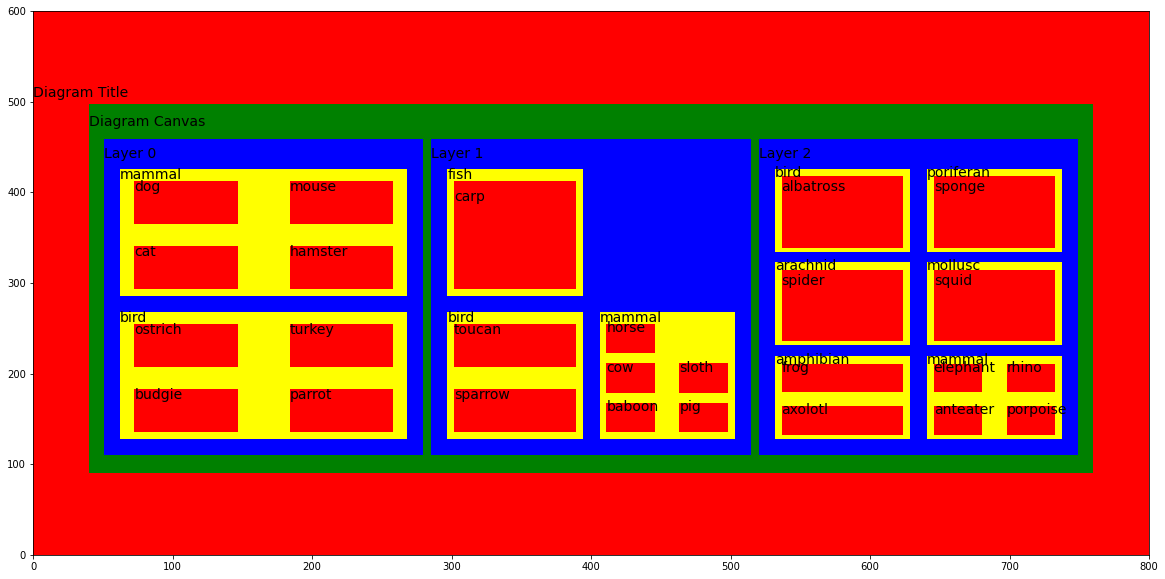

In [8]:
ch = list(root.walk_children())[::-1]
fig = plt.figure(figsize=(20,10))
from matplotlib.patches import Rectangle as rect
ax=plt.gca()
for c in ch:
#    print (c.name, c.x, c.y, c.style['background_colour'], c.local_pos)
#    print(c.get_label())
#    print()
    r = rect(xy=(c.x, c.y), width=c.w, height=c.h, alpha=1.0, facecolor=c.style['background_colour'])
    ax.text(c.x, c.y+c.h-(c.style['margin_top']*c.h), c.get_label(), fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')
    
    ax.add_patch(r)

ax.set_xlim(0,800)
ax.set_ylim(0,600)


In [9]:
import svgpanels

In [10]:
ch = list(root.walk_children())[::-1]
svg_objects=[]
for c in ch:
#    print(c.x, c.y, c.w, c.h, (c.style['margin_top']*c.h), (c.style['margin_top']*c.h))
    svg_objects.append(svgpanels.titled_panel(c.x, c.y, c.w, c.h, \
                                              (c.style['margin_top']*c.h)*0.5, \
                                              (c.style['margin_top']*c.h),\
                                              c.get_label(),\
                                              oversize_method="truncate") )

content = "\n".join(svg_objects)
HTML(svgpanels.svg_viewbox(-20,-20,900,600,600,600, content))